In [2]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

3.7.5 (v3.7.5:5c02a39a0b, Dec 27 2019, 11:41:00) 
[GCC 6.3.0 20170516]


In [5]:
# single qbit states
zero = np.array([1,0])
one = np.array([0,1])

# single qbit gates
I = np.array([[1,0],[0,1]])

X = np.array([[0,1],[1,0]])
Y = np.array([[0,1j],[-1j,0]])
Z = np.array([[1,0],[0,-1]])

H = np.array([[1,1],[1,-1]]) / np.sqrt(2)

# 2 qbit states
# 2 stands for 2 bits
zero2  = np.outer(zero, zero).reshape(4)
one2   = np.outer(zero, one ).reshape(4)
two2   = np.outer(one , zero).reshape(4)
three2 = np.outer(one , one ).reshape(4)

# 2 qbits gates
C = np.array([
	[1,0,0,0],
	[0,1,0,0],
	[0,0,0,1],
	[0,0,1,0],
])

H2 = np.array([
	[1, 1, 1, 1],
	[1,-1, 1,-1],
	[1, 1,-1,-1],
	[1,-1,-1, 1],
]) / 2


In [6]:
# example #1: creation of an entangled state (phi_plus)

# initialize 2 qbits
q0 = q1 = zero
# apply H on q1 (control bit)
q1 = H.dot(q1)
# create a variable of the 2-bit state
q = np.outer(q1, q0).reshape(4)
# apply C
C.dot(q)

array([0.70710678, 0.        , 0.        , 0.70710678])

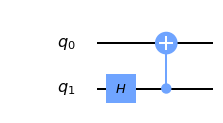

In [7]:
# example #2: C H circuit

amount_of_qbits = 2

# build the main circuit
circuit = QuantumCircuit(amount_of_qbits)

circuit.h(1)
circuit.cnot(1,0)

# Draw the circuit
circuit.draw(output="mpl")



Total count for 00 and 11 are: {'11': 489, '00': 511}


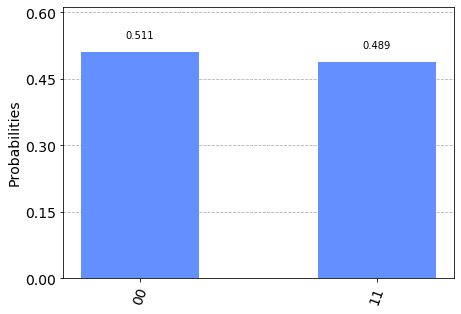

In [8]:
# example #3: C H circuit simulation

amount_of_qbits = 2
amount_of_cbits = 2

# build the main circuit
circuit = QuantumCircuit(amount_of_qbits, amount_of_cbits)

circuit.h(1)
circuit.cnot(1,0)
circuit.measure([0,1], [0,1])

# Draw the circuit
# circuit.draw(output="mpl")

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()

counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

plot_histogram(counts)

In [9]:
def create_entangled_state(q0=0, q1=0):
    "q0 and q1 takes either 0 or 1 as their initial value"
    # create a circuit
    amount_of_qbits = 2

    circuit = QuantumCircuit(amount_of_qbits)
    
    # set the initial state according to the parameters:
    if q0:
        circuit.x(0)
    if q1:
        circuit.x(1)
    
    # entangle them!
    circuit.h(1)
    circuit.cnot(1,0)

    # extract the result
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(circuit, simulator)
    result = job.result()
    outputstate = result.get_statevector(circuit, decimals=3)
    
    return outputstate

# ( |00> + |11> ) / sqrt(2)
Phi_plus  = create_entangled_state(0,0)
# ( |00> - |11> ) / sqrt(2)
Phi_minus = create_entangled_state(0,1)
# ( |01> + |10> ) / sqrt(2)
Psi_plus  = create_entangled_state(1,0)
# ( |01> - |10> ) / sqrt(2)
Psi_minus = create_entangled_state(1,1)

In [10]:
Phi_minus

array([ 0.707-0.j,  0.   +0.j,  0.   +0.j, -0.707+0.j])

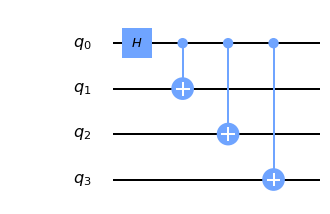


Total count for 00 and 11 are: {'0000': 490, '1111': 510}


/usr/local/lib/python3.8/site-packages/qiskit/visualization/counts_visualization.py:187: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


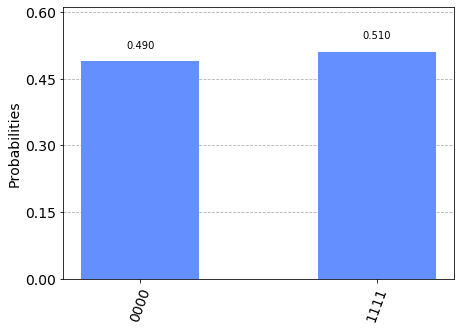

In [22]:
# initializing GHZ state with N qbits
N = 4

GHZ_circuit = QuantumCircuit(N)
# apply Hadamard to the first qbit, to get the state |+>
GHZ_circuit.h(0)
# entangle the first qbit with every other qbit
for i in range(1, N):
    GHZ_circuit.cnot(0,i)

display( GHZ_circuit.draw(output="mpl") )

## extract the statevector result
# simulator = Aer.get_backend('statevector_simulator')
# job = execute(GHZ_circuit, simulator)
# result = job.result()
# outputstate = result.get_statevector(GHZ_circuit, decimals=3)
# print(outputstate)

## alternatively, extract the result using a simulation

GHZ_circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')
job = execute(GHZ_circuit, simulator, shots=1000)
result = job.result()

counts = result.get_counts(GHZ_circuit)
print("\nTotal counts are:",counts)

plot_histogram(counts)

In [21]:
print('No counts for experiment "        ┌───┐               \nq_0: |0>┤ H ├──■────■────■──\n        └───┘┌─┴─┐  │    │  \nq_1: |0>─────┤ X ├──┼────┼──\n             └───┘┌─┴─┐  │  \nq_2: |0>──────────┤ X ├──┼──\n                  └───┘┌─┴─┐\nq_3: |0>───────────────┤ X ├\n                       └───┘"')

No counts for experiment "        ┌───┐               
q_0: |0>┤ H ├──■────■────■──
        └───┘┌─┴─┐  │    │  
q_1: |0>─────┤ X ├──┼────┼──
             └───┘┌─┴─┐  │  
q_2: |0>──────────┤ X ├──┼──
                  └───┘┌─┴─┐
q_3: |0>───────────────┤ X ├
                       └───┘"


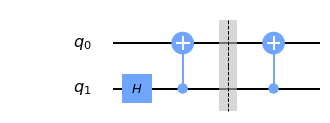

In [3]:
# un-entanglement example

amount_of_qbits = 2
# build the main circuit
circuit = QuantumCircuit(amount_of_qbits)

circuit.h(1)
circuit.cx(1,0)
circuit.barrier()
circuit.cx(1,0)

# Draw the circuit
circuit.draw(output="mpl")
# circuit.draw(output="text")